In [1]:
import json
import os
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.optimize as opt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from copy import deepcopy

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [9]:
data = pd.read_csv('out/results.csv')  # read data


In [10]:
# qui tengo in considerazione tutte le 6 possibili combinazioni

condizione_1 = (data["LongBattery"] == True) & (data["RichEnvironment"] == True) & (data["FirstAreaRich"] == True)
data1 = data [condizione_1] # prendimi in data quelle righe dove la condizione_1 è soddisfatta e chiama questa variabile contenente i dati puliti secondo la mia condizione "data1"

condizione_2 = (data["LongBattery"] == True) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == True)
data2 = data [condizione_2]

condizione_3 = (data["LongBattery"] == False) & (data["RichEnvironment"] == True) & (data["FirstAreaRich"] == True)
data3 = data [condizione_3]

condizione_4 = (data["LongBattery"] == False) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == True)
data4 = data [condizione_4]

condizione_5 = (data["LongBattery"] == True) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == False)
data5 = data [condizione_5]

condizione_6 = (data["LongBattery"] == False) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == False)
data6 = data [condizione_6]


exitvalue_firstarea_1 = data1["BoxOpenedFirstArea"] # dentro data 1 prendi solo la colonna "BoxOpenedFirstArea"
exitvalue_firstarea_1 = exitvalue_firstarea_1.to_numpy() #toglie gli indici e mi scrive solo i valori dei BoxOpenedFirstArea

exitvalue_firstarea_2 = data2["BoxOpenedFirstArea"] # dentro data 1 prendi solo la colonna "BoxOpenedFirstArea"
exitvalue_firstarea_2 = exitvalue_firstarea_2.to_numpy() #toglie gli indici e mi scrive solo i valori dei BoxOpenedFirstArea

exitvalue_firstarea_3 = data3["BoxOpenedFirstArea"] # dentro data 1 prendi solo la colonna "BoxOpenedFirstArea"
exitvalue_firstarea_3 = exitvalue_firstarea_3.to_numpy()#toglie gli indici e mi scrive solo i valori dei BoxOpenedFirstArea

exitvalue_firstarea_4 = data4["BoxOpenedFirstArea"]
exitvalue_firstarea_4 = exitvalue_firstarea_4.to_numpy()

exitvalue_firstarea_5 = data5["BoxOpenedFirstArea"]
exitvalue_firstarea_5 = exitvalue_firstarea_5.to_numpy()

exitvalue_firstarea_6 = data6["BoxOpenedFirstArea"]
exitvalue_firstarea_6 = exitvalue_firstarea_6.to_numpy()


exitvalue_firstarea_1_mean = exitvalue_firstarea_1.mean()
exitvalue_firstarea_2_mean = exitvalue_firstarea_2.mean()
exitvalue_firstarea_5_mean = exitvalue_firstarea_5.mean()
exitvalue_firstarea_3_mean = exitvalue_firstarea_3.mean()
exitvalue_firstarea_4_mean = exitvalue_firstarea_4.mean()
exitvalue_firstarea_6_mean = exitvalue_firstarea_6.mean()


print("MEDIA DEL NUMERO DI CASSE PRESE NELLA PRIMA AREA QUANDO L'AMBIENTE ERA RICCO E LA BATTERIA LUNGA")
print(exitvalue_firstarea_1_mean)
print ("")
print("MEDIA DEL NUMERO DI CASSE PRESE NELLA PRIMA AREA QUANDO L'AMBIENTE ERA POVERO E SONO ENTRATI SUBITO NELL'AREA RICCA E LA BATTERIA ERA LUNGA")
print(exitvalue_firstarea_2_mean)
print ("")
print("MEDIA DEL NUMERO DI CASSE PRESE NELLA PRIMA AREA QUANDO L'AMBIENTE ERA POVERO E SONO ENTRATI SUBITO NELL'AREA POVERA E LA BATTERIA ERA LUNGA")
print(exitvalue_firstarea_5_mean)
print ("")

print("MEDIA DEL NUMERO DI CASSE PRESE NELLA PRIMA AREA QUANDO L'AMBIENTE ERA RICCO E LA BATTERIA CORTA")
print(exitvalue_firstarea_3_mean)
print ("")
print("MEDIA DEL NUMERO DI CASSE PRESE NELLA PRIMA AREA QUANDO L'AMBIENTE ERA POVERO E SONO ENTRATI SUBITO NELL'AREA RICCA E LA BATTERIA ERA CORTA")
print(exitvalue_firstarea_4_mean)
print ("")
print("MEDIA DEL NUMERO DI CASSE PRESE NELLA PRIMA AREA QUANDO L'AMBIENTE ERA POVERO E SONO ENTRATI SUBITO NELL'AREA POVERA E LA BATTERIA ERA CORTA")
print(exitvalue_firstarea_6_mean)




MEDIA DEL NUMERO DI CASSE PRESE NELLA PRIMA AREA QUANDO L'AMBIENTE ERA RICCO E LA BATTERIA LUNGA
3.3234323432343236

MEDIA DEL NUMERO DI CASSE PRESE NELLA PRIMA AREA QUANDO L'AMBIENTE ERA POVERO E SONO ENTRATI SUBITO NELL'AREA RICCA E LA BATTERIA ERA LUNGA
3.603448275862069

MEDIA DEL NUMERO DI CASSE PRESE NELLA PRIMA AREA QUANDO L'AMBIENTE ERA POVERO E SONO ENTRATI SUBITO NELL'AREA POVERA E LA BATTERIA ERA LUNGA
1.8571428571428572

MEDIA DEL NUMERO DI CASSE PRESE NELLA PRIMA AREA QUANDO L'AMBIENTE ERA RICCO E LA BATTERIA CORTA
2.5372168284789645

MEDIA DEL NUMERO DI CASSE PRESE NELLA PRIMA AREA QUANDO L'AMBIENTE ERA POVERO E SONO ENTRATI SUBITO NELL'AREA RICCA E LA BATTERIA ERA CORTA
2.888198757763975

MEDIA DEL NUMERO DI CASSE PRESE NELLA PRIMA AREA QUANDO L'AMBIENTE ERA POVERO E SONO ENTRATI SUBITO NELL'AREA POVERA E LA BATTERIA ERA CORTA
1.6333333333333333


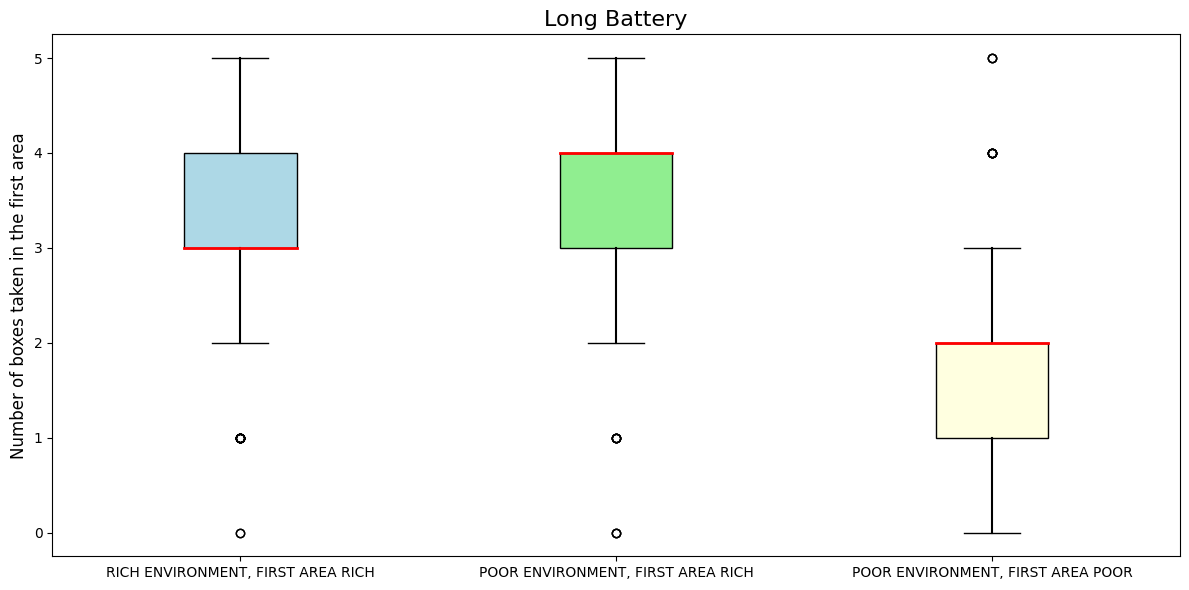

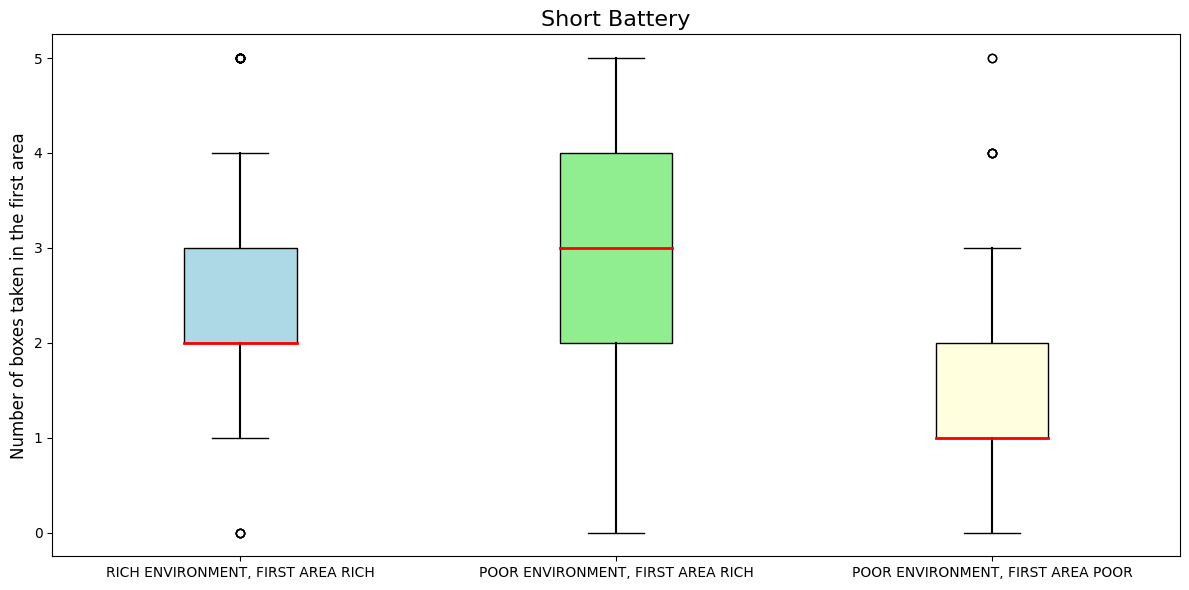

In [11]:
data = [exitvalue_firstarea_1, exitvalue_firstarea_2,exitvalue_firstarea_5]

plt.figure(figsize=(12, 6))

box = plt.boxplot(data, labels=[
    "RICH ENVIRONMENT, FIRST AREA RICH",
    "POOR ENVIRONMENT, FIRST AREA RICH",
    "POOR ENVIRONMENT, FIRST AREA POOR"
], patch_artist=True)  # Utilizzo patch_artist per riempire i box

# Modifico lo stile dei box e dei baffi
colors = ['lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
for whisker in box['whiskers']:
    whisker.set(color='black', linestyle='-', linewidth=1.5)



# Voglio le mediane rosse
for median in box['medians']:
    median.set(color='red', linewidth=2)

plt.title('Long Battery', fontsize=16)
plt.ylabel('Number of boxes taken in the first area', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()
plt.show()


#####

data = [exitvalue_firstarea_3, exitvalue_firstarea_4, exitvalue_firstarea_6]

plt.figure(figsize=(12, 6))

box = plt.boxplot(data, labels=[
    "RICH ENVIRONMENT, FIRST AREA RICH",
    "POOR ENVIRONMENT, FIRST AREA RICH",
    "POOR ENVIRONMENT, FIRST AREA POOR"
], patch_artist=True)  # Utilizzo patch_artist per riempire i box

# Modifico lo stile dei box e dei baffi
colors = ['lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
for whisker in box['whiskers']:
    whisker.set(color='black', linestyle='-', linewidth=1.5)



# Voglio le mediane rosse
for median in box['medians']:
    median.set(color='red', linewidth=2)

plt.title('Short Battery', fontsize=16)
plt.ylabel('Number of boxes taken in the first area', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()
plt.show()



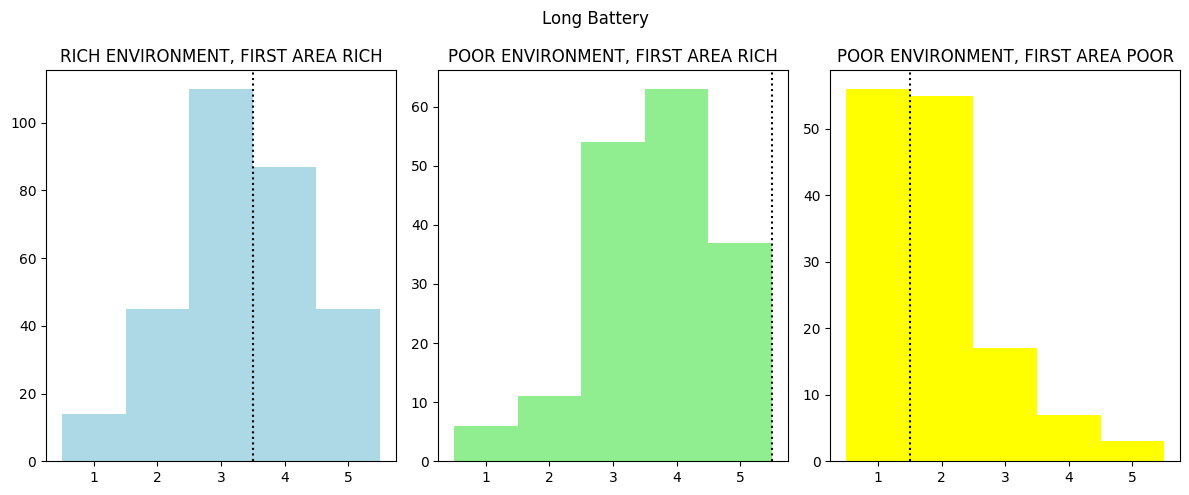

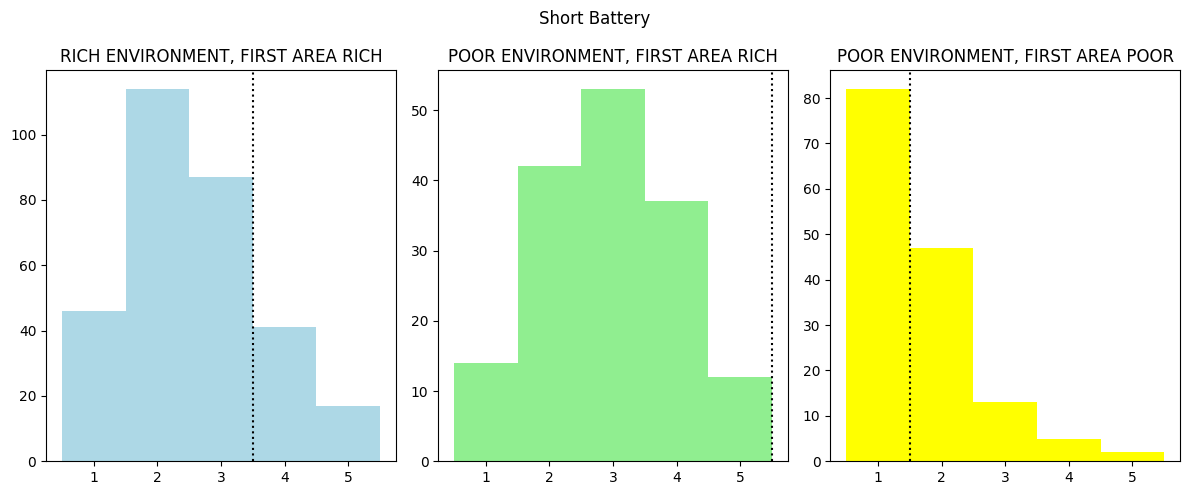

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5)) # Creazione di tre assi separati


# Disegno degli istogrammi su assi separati
axs[0].hist(exitvalue_firstarea_1, np.arange(0.5, 6.5), color= "lightblue")
axs[0].set_title("RICH ENVIRONMENT, FIRST AREA RICH")
axs[0].axvline(x=3.5, color='black', linestyle=':')

axs[1].hist(exitvalue_firstarea_2, np.arange(0.5, 6.5), color= "lightgreen")
axs[1].set_title('POOR ENVIRONMENT, FIRST AREA RICH')
axs[1].axvline(x=5.5, color='black', linestyle=':')

axs[2].hist(exitvalue_firstarea_5, np.arange(0.5, 6.5), color="yellow")
axs[2].set_title('POOR ENVIRONMENT, FIRST AREA POOR')
axs[2].axvline(x=1.5, color='black', linestyle=':')

# Impostazioni comuni per la figura
fig.suptitle("Long Battery")

plt.tight_layout()
plt.show()


#####


fig, axs = plt.subplots(1, 3, figsize=(12, 5)) # Creazione di tre assi separati

# Disegno degli istogrammi su assi separati
axs[0].hist(exitvalue_firstarea_3, np.arange(0.5, 6.5), color="lightblue")
axs[0].set_title("RICH ENVIRONMENT, FIRST AREA RICH")
axs[0].axvline(x=3.5, color='black', linestyle=':')

axs[1].hist(exitvalue_firstarea_4, np.arange(0.5, 6.5), color="lightgreen")
axs[1].set_title('POOR ENVIRONMENT, FIRST AREA RICH')
axs[1].axvline(x=5.5, color='black', linestyle=':')

axs[2].hist(exitvalue_firstarea_6,np.arange(0.5, 6.5), color="yellow")
axs[2].set_title('POOR ENVIRONMENT, FIRST AREA POOR')
axs[2].axvline(x=1.5, color='black', linestyle=':')

# Impostazioni comuni per la figura
fig.suptitle("Short Battery")

plt.tight_layout()
plt.show()


### ho meso il range 1,7 per eliminare chi non prende nessuna cassa nella prima area e per avere una rappresentazione grafica più chiara


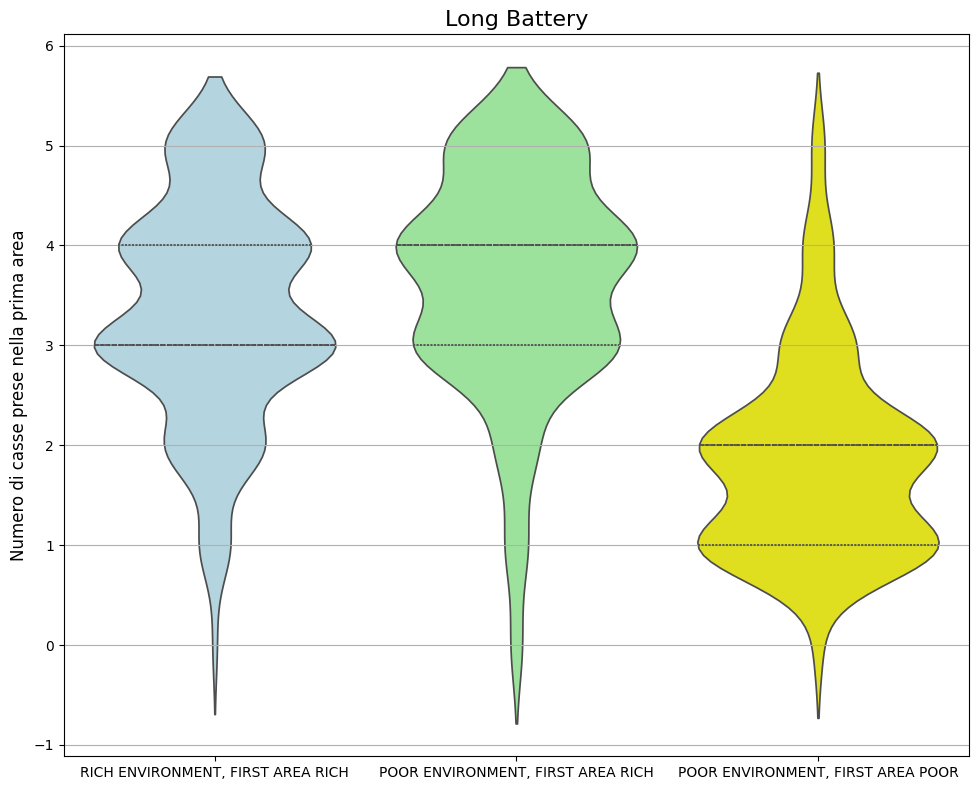

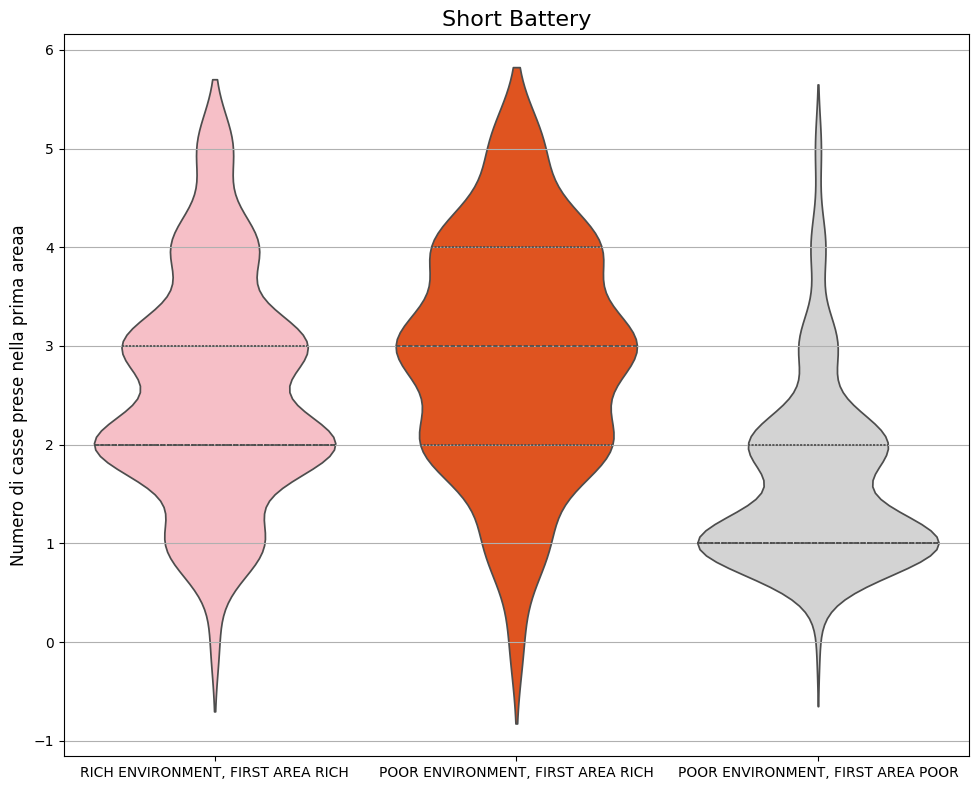

In [15]:
import seaborn as sns

data = [exitvalue_firstarea_1, exitvalue_firstarea_2, exitvalue_firstarea_5]

plt.figure(figsize=(10, 8))

violin = sns.violinplot(data=data, inner='quartile', palette=["lightblue", "lightgreen", "yellow"])

plt.title('Long Battery', fontsize=16)
plt.ylabel('Numero di casse prese nella prima area', fontsize=12)
plt.xticks([0, 1, 2], [
    "RICH ENVIRONMENT, FIRST AREA RICH",
    "POOR ENVIRONMENT, FIRST AREA RICH",
    "POOR ENVIRONMENT, FIRST AREA POOR"
], fontsize=10)

plt.yticks(fontsize=10)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


#####



data = [exitvalue_firstarea_3, exitvalue_firstarea_4, exitvalue_firstarea_6]

plt.figure(figsize=(10, 8))

violin = sns.violinplot(data=data, inner='quartile', palette=["lightpink", "orangered", "lightgray"])


plt.title('Short Battery', fontsize=16)
plt.ylabel('Numero di casse prese nella prima areaa', fontsize=12)
plt.xticks([0, 1, 2], [
    "RICH ENVIRONMENT, FIRST AREA RICH",
    "POOR ENVIRONMENT, FIRST AREA RICH",
    "POOR ENVIRONMENT, FIRST AREA POOR"
], fontsize=10)

plt.yticks(fontsize=10)
plt.grid(axis='y')

plt.tight_layout()
plt.show()



In [17]:
condizione_7 = (data["LongBattery"] == True) & (data["RichEnvironment"] == True) & (data["FirstAreaRich"] == True)
data7= data [condizione_7]

condizione_8 = (data["LongBattery"] == True) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == True)
data8 = data [condizione_8]

condizione_9 = (data["LongBattery"] == False) & (data["RichEnvironment"] == True) & (data["FirstAreaRich"] == True)
data9 = data [condizione_9]

condizione_10 = (data["LongBattery"] == False) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == True)
data10 = data [condizione_10]

condizione_11= (data["LongBattery"] == True) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == False)
data11 = data [condizione_11]

condizione_12 = (data["LongBattery"] == False) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == False)
data12 = data [condizione_12]


CoinsGainedPerTrial_7 = data7["CoinsGainedPerTrial"] # dentro data 1 prendi solo la colonna "BoxOpenedFirstArea"
CoinsGainedPerTrial_7 = CoinsGainedPerTrial_7.to_numpy() #toglie gli indici e mi scrive solo i valori dei BoxOpenedFirstArea

CoinsGainedPerTrial_8 = data8["CoinsGainedPerTrial"] # dentro data 1 prendi solo la colonna "BoxOpenedFirstArea"
CoinsGainedPerTrial_8 = CoinsGainedPerTrial_8.to_numpy() #toglie gli indici e mi scrive solo i valori dei BoxOpenedFirstArea

CoinsGainedPerTrial_9 = data9["CoinsGainedPerTrial"] # dentro data 1 prendi solo la colonna "BoxOpenedFirstArea"
CoinsGainedPerTrial_9 = CoinsGainedPerTrial_9.to_numpy()#toglie gli indici e mi scrive solo i valori dei BoxOpenedFirstArea

CoinsGainedPerTrial_10 = data10["CoinsGainedPerTrial"]
CoinsGainedPerTrial_10 = CoinsGainedPerTrial_10.to_numpy()

CoinsGainedPerTrial_11 = data11["CoinsGainedPerTrial"]
CoinsGainedPerTrial_11 = CoinsGainedPerTrial_11.to_numpy()

CoinsGainedPerTrial_12 = data12["CoinsGainedPerTrial"]
CoinsGainedPerTrial_12 = CoinsGainedPerTrial_12.to_numpy()



CoinsGainedPerTrial_7_mean = CoinsGainedPerTrial_7.mean()
CoinsGainedPerTrial_8_mean = CoinsGainedPerTrial_8.mean()
CoinsGainedPerTrial_9_mean = CoinsGainedPerTrial_9.mean()
CoinsGainedPerTrial_10_mean = CoinsGainedPerTrial_10.mean()
CoinsGainedPerTrial_11_mean = CoinsGainedPerTrial_11.mean()
CoinsGainedPerTrial_12_mean = CoinsGainedPerTrial_12.mean()


print("MEDIA DEI NUMERO DI PUNTI PRESI NEL TRIAL QUANDO L'AMBIENTE ERA RICCO E LA BATTERIA LUNGA")
print(CoinsGainedPerTrial_7_mean)
print ("")
print("MEDIA DEI NUMERO DI PUNTI PRESI NEL TRIAL QUANDO L'AMBIENTE ERA RICCO E SONO ENTRATI SUBITO NELL'AREA RICCA E LA BATTERIA LUNGA")
print(CoinsGainedPerTrial_8_mean)
print ("")
print("MEDIA DEI NUMERO DI PUNTI PRESI NEL TRIAL QUANDO L'AMBIENTE ERA POVERO E SONO ENTRATI SUBITO NELL'AREA POVERA E LA BATTERIA ERA LUNGA")
print(CoinsGainedPerTrial_11_mean)
print ("")

print("MEDIA DEI NUMERO DI PUNTI PRESI NEL TRIAL QUANDO L'AMBIENTE ERA RICCO E LA BATTERIA CORTA")
print(CoinsGainedPerTrial_9_mean)
print ("")
print("MEDIA DEI NUMERO DI PUNTI PRESI NEL TRIAL QUANDO L'AMBIENTE ERA POVERO E SONO ENTRATI SUBITO NELL'AREA RICCA E LA BATTERIA ERA CORTA")
print(CoinsGainedPerTrial_10_mean)
print ("")
print("MEDIA DEI NUMERO DI PUNTI PRESI NEL TRIAL QUANDO L'AMBIENTE ERA POVERO E SONO ENTRATI SUBITO NELL'AREA POVERA E LA BATTERIA ERA CORTA")
print(CoinsGainedPerTrial_12_mean)




TypeError: list indices must be integers or slices, not str

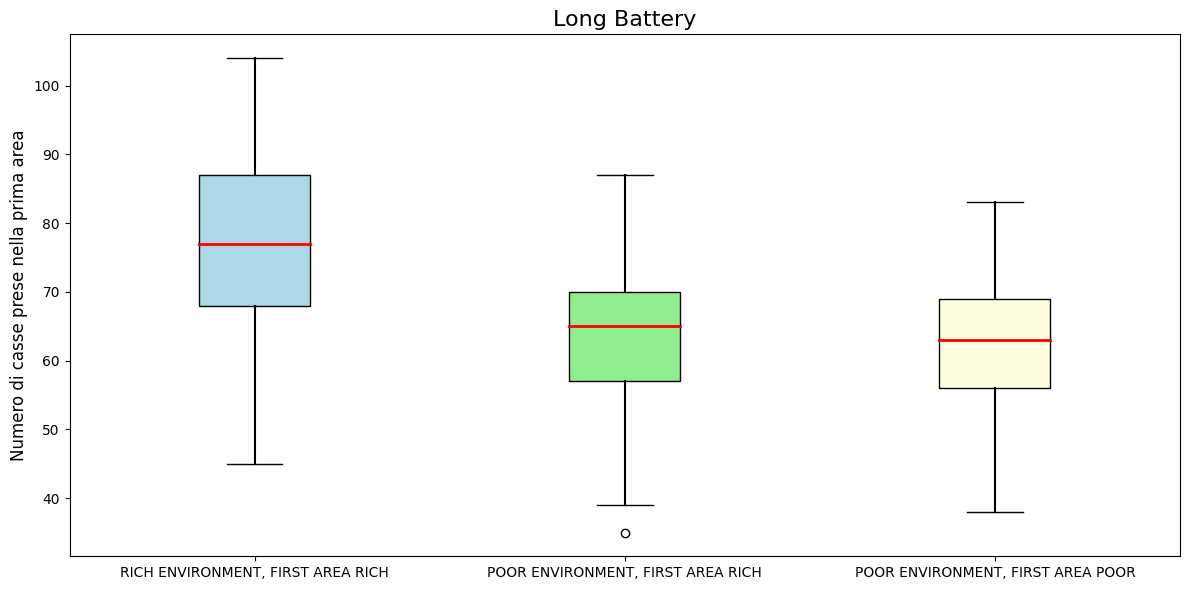

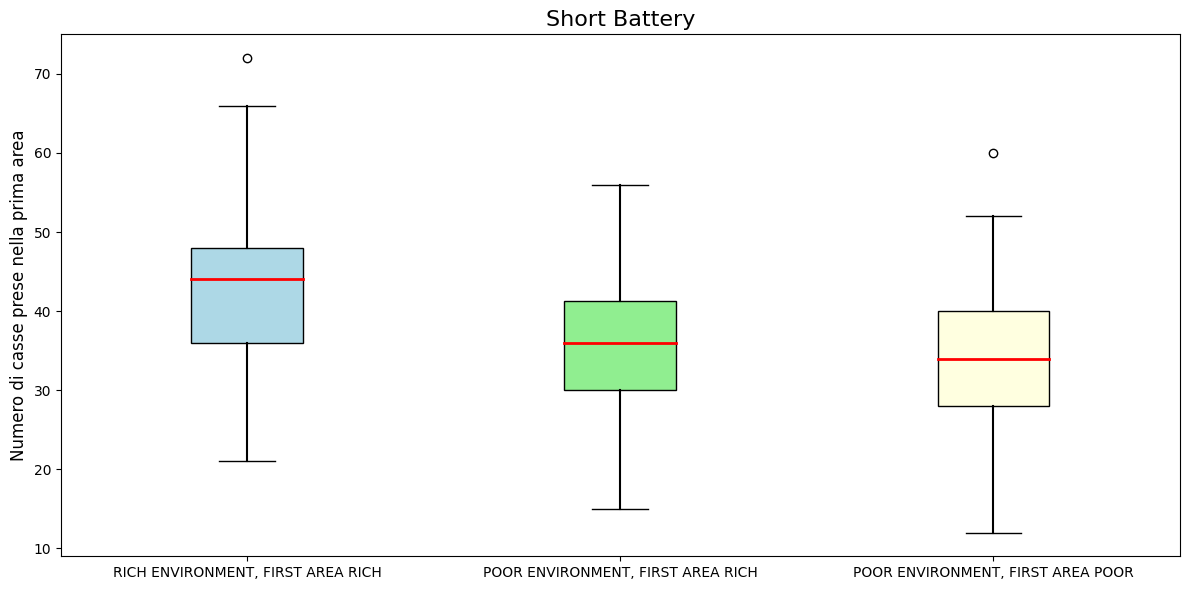

In [ ]:
data = [CoinsGainedPerTrial_7, CoinsGainedPerTrial_8,CoinsGainedPerTrial_11]

plt.figure(figsize=(12, 6))

box = plt.boxplot(data, labels=[
    "RICH ENVIRONMENT, FIRST AREA RICH",
    "POOR ENVIRONMENT, FIRST AREA RICH",
    "POOR ENVIRONMENT, FIRST AREA POOR"
], patch_artist=True)  # Utilizzo patch_artist per riempire i box

# Modifico lo stile dei box e dei baffi
colors = ['lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
for whisker in box['whiskers']:
    whisker.set(color='black', linestyle='-', linewidth=1.5)



# Voglio le mediane rosse
for median in box['medians']:
    median.set(color='red', linewidth=2)

plt.title('Long Battery', fontsize=16)
plt.ylabel('Numero di monete prese per trial', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()
plt.show()


#####

data = [CoinsGainedPerTrial_9, CoinsGainedPerTrial_10, CoinsGainedPerTrial_12]

plt.figure(figsize=(12, 6))

box = plt.boxplot(data, labels=[
    "RICH ENVIRONMENT, FIRST AREA RICH",
    "POOR ENVIRONMENT, FIRST AREA RICH",
    "POOR ENVIRONMENT, FIRST AREA POOR"
], patch_artist=True)  # Utilizzo patch_artist per riempire i box

# Modifico lo stile dei box e dei baffi
colors = ['lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
for whisker in box['whiskers']:
    whisker.set(color='black', linestyle='-', linewidth=1.5)



# Voglio le mediane rosse
for median in box['medians']:
    median.set(color='red', linewidth=2)

plt.title('Short Battery', fontsize=16)
plt.ylabel('Numero di monete prese per trial', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()
plt.show()



NameError: name 'CoinsGainedPerTrial_7' is not defined

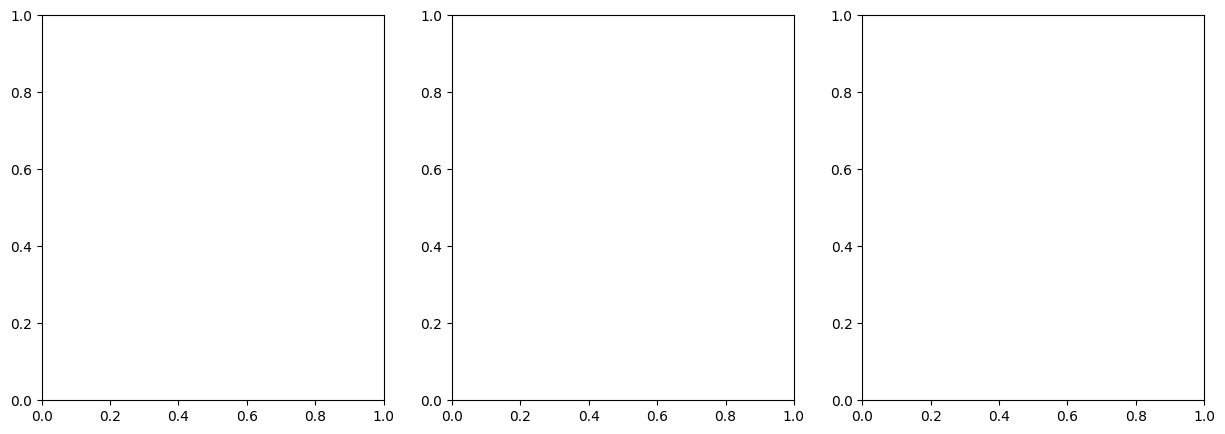

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5)) # Creazione di tre assi separati


# Disegno degli istogrammi su assi separati
axs[0].hist(CoinsGainedPerTrial_7, np.arange(80), color= "lightblue")
axs[0].set_title("RICH ENVIRONMENT, FIRST AREA RICH")


axs[1].hist(CoinsGainedPerTrial_8, np.arange(80), color= "lightgreen")
axs[1].set_title('POOR ENVIRONMENT, FIRST AREA RICH')


axs[2].hist(CoinsGainedPerTrial_11, np.arange(80), color="yellow")
axs[2].set_title('POOR ENVIRONMENT, FIRST AREA POOR')


# Impostazioni comuni per la figura
fig.suptitle("Long Battery")

plt.tight_layout()
plt.show()


#####


fig, axs = plt.subplots(1, 3, figsize=(15, 5)) # Creazione di tre assi separati

# Disegno degli istogrammi su assi separati
axs[0].hist(CoinsGainedPerTrial_9, np.arange(80), color="lightpink")
axs[0].set_title("RICH ENVIRONMENT, FIRST AREA RICH")


axs[1].hist(CoinsGainedPerTrial_10, np.arange(80), color="orangered")
axs[1].set_title('POOR ENVIRONMENT, FIRST AREA RICH')


axs[2].hist(CoinsGainedPerTrial_12, np.arange(80), color="lightgray")
axs[2].set_title('POOR ENVIRONMENT, FIRST AREA POOR')


# Impostazioni comuni per la figura
fig.suptitle("Short Battery")

plt.tight_layout()
plt.show()